# 1 Import Librerys
## Import Pandas and Numpy 

In [1]:
import pandas as pd
import numpy as np

## DataSet Rock history
### Review and read datset  

In [2]:
file = open('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Projetos/History of Rock(1950-2020)/Data/history-of-rock-spotify.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('latin-1'))
file.close()

index,name,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence

0,Smells Like Teen Spirit,Nirvana,1991,5.032,74,0.502,2.55E-05,0.502,0.912,0.000173,1,0.106,-4.556,0.0564,116.761,4,0.72

1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047166667,78,0.338,0.58,0.338,0.34,0.0032,9,0.116,-12.049,0.0339,82.433,4,0.197

2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333333,74,0.392,0.288,0.392,0.402,0,0,0.243,-9.961,0.0536,143.883,4,0.228

3,Imagine - Remastered 2010,John Lennon,1971,3.1311,77,0.547,0.907,0.547,0.257,0.183,0,0.0935,-12.358,0.0252,75.752,4,0.169



In [3]:
rockhistory=pd.read_csv('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Projetos/History of Rock(1950-2020)/Data/history-of-rock-spotify.csv', sep = ',', decimal = '.', encoding = 'latin-1')
rockhistory=rockhistory[['name','artist','release_date','popularity']]
rockhistory

,name,artist,release_date,popularity
0,Smells Like Teen Spirit,Nirvana,1991,74
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,78
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,74
3,Imagine - Remastered 2010,John Lennon,1971,77
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,77
...,...,...,...,...
5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,47
5480,Cellophane,King Gizzard & The Lizard Wizard,2014,44
5481,Hot Water,King Gizzard & The Lizard Wizard,2014,40
5482,Vitamin C - 2004 Remastered Version,CAN,1972,52


### Clean DataSet Rock history

In [4]:
rockhistory= rockhistory.rename(columns={"release_date":"release_year"})
rockhistory['release'] = 1
rockhistory

,name,artist,release_year,popularity,release
0,Smells Like Teen Spirit,Nirvana,1991,74,1
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,78,1
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,74,1
3,Imagine - Remastered 2010,John Lennon,1971,77,1
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,77,1
...,...,...,...,...,...
5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,47,1
5480,Cellophane,King Gizzard & The Lizard Wizard,2014,44,1
5481,Hot Water,King Gizzard & The Lizard Wizard,2014,40,1
5482,Vitamin C - 2004 Remastered Version,CAN,1972,52,1


In [5]:
rocksongsperyear = rockhistory.groupby(['release_year']).agg( 
    totalsongsyear = pd.NamedAgg('release', 'sum'))
rockreleaseyear = rockhistory.merge(rocksongsperyear, on=['release_year'])
rockreleaseyear

,name,artist,release_year,popularity,release,totalsongsyear
0,Smells Like Teen Spirit,Nirvana,1991,74,1,106
1,Enter Sandman,Metallica,1991,74,1,106
2,One,U2,1991,76,1,106
3,Under the Bridge,Red Hot Chili Peppers,1991,81,1,106
4,Alive,Pearl Jam,1991,75,1,106
...,...,...,...,...,...,...
5479,My Gun,The Rubens,2012,33,1,83
5480,Prayer Of The Refugee,Rise Against,2012,0,1,83
5481,Alligator Skin,Villainy,2012,35,1,83
5482,"""45""",The Gaslight Anthem,2012,50,1,83


In [6]:
artisttrayectori = rockreleaseyear.groupby(['artist']).agg(
    first_year=pd.NamedAgg('release_year', 'min'),
    last_year=pd.NamedAgg('release_year', 'max'),
    meanpopularity=pd.NamedAgg('popularity','mean'),
    totalsongartist=pd.NamedAgg('artist','count'))
rocktotalrelease = rockreleaseyear.merge(artisttrayectori, on=['artist'])
rocktotalrelease

,name,artist,release_year,popularity,release,totalsongsyear,first_year,last_year,meanpopularity,totalsongartist
0,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19
1,Come As You Are,Nirvana,1991,72,1,106,1991,2018,61.473684,19
2,In Bloom - Nevermind Version,Nirvana,1991,65,1,106,1991,2018,61.473684,19
3,Lithium,Nirvana,1991,68,1,106,1991,2018,61.473684,19
4,Breed,Nirvana,1991,59,1,106,1991,2018,61.473684,19
...,...,...,...,...,...,...,...,...,...,...
5479,Take It On Faith,Matt Mays,2012,39,1,83,2012,2012,39.000000,1
5480,Forever Tuesday Morning,The Mockers,2012,33,1,83,2012,2012,33.000000,1
5481,Love Bites (So Do I),Halestorm,2012,51,1,83,2012,2012,51.000000,1
5482,Scarecrows,One Bad Son,2012,31,1,83,2012,2012,31.000000,1


In [7]:
rocksongsperartist = rocktotalrelease.groupby(['artist','release_year']).agg(    
    totalsongsartistyear = pd.NamedAgg('artist', 'count'))
rocktotalreleaseyear = rocktotalrelease.merge(rocksongsperartist, on=['artist'])
rocktotalreleaseyear

,name,artist,release_year,popularity,release,totalsongsyear,first_year,last_year,meanpopularity,totalsongartist,totalsongsartistyear
0,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19,9
1,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19,1
2,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19,5
3,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19,2
4,Smells Like Teen Spirit,Nirvana,1991,74,1,106,1991,2018,61.473684,19,1
...,...,...,...,...,...,...,...,...,...,...,...
29412,Take It On Faith,Matt Mays,2012,39,1,83,2012,2012,39.000000,1,1
29413,Forever Tuesday Morning,The Mockers,2012,33,1,83,2012,2012,33.000000,1,1
29414,Love Bites (So Do I),Halestorm,2012,51,1,83,2012,2012,51.000000,1,1
29415,Scarecrows,One Bad Son,2012,31,1,83,2012,2012,31.000000,1,1


In [26]:
rocktotalreleaseyear['rateartistrelease']=round(rocktotalreleaseyear['totalsongsartistyear']/rocktotalreleaseyear['totalsongartist'],4)*100
rocktotalreleaseyear['rateartistreleaseyear']=round(rocktotalreleaseyear['totalsongsartistyear']/rocktotalreleaseyear['totalsongsyear'],4)*100
rocktotalreleaseyear['yearscareer'] = rocktotalreleaseyear['last_year']-rocktotalreleaseyear['first_year']
rockartists=rocktotalreleaseyear[['artist','first_year','last_year','meanpopularity','totalsongartist','yearscareer']]
rockartist=rockartists.drop_duplicates()
rockartist.sort_values('yearscareer',ascending=False).head(20)

,artist,first_year,last_year,meanpopularity,totalsongartist,yearscareer
17958,Elvis Presley,1956,2019,52.060606,33,63
27920,Buddy Holly,1958,2018,31.555556,9,60
10306,Various Artists,1963,2020,29.706897,116,57
21747,Johnny Cash,1957,2014,59.333333,6,57
15315,The Beatles,1963,2019,61.035714,84,56
29258,Carl Perkins,1957,2013,42.500000,4,56
4857,The Rolling Stones,1964,2020,51.500000,58,56
25640,The Spencer Davis Group,1966,2019,54.000000,2,53
4631,The Doors,1967,2020,58.727273,22,53
23462,Jimi Hendrix,1967,2020,51.722222,18,53


<AxesSubplot:title={'center':'Artist career'}, xlabel='artist'>

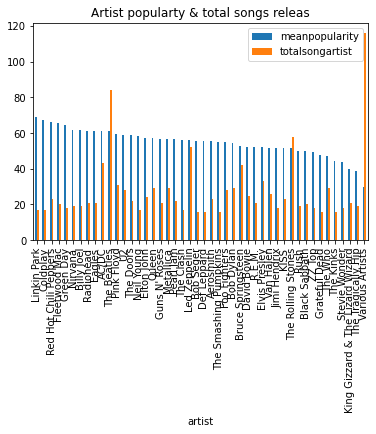

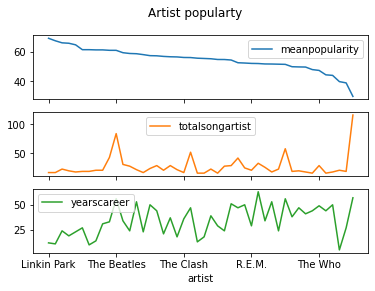

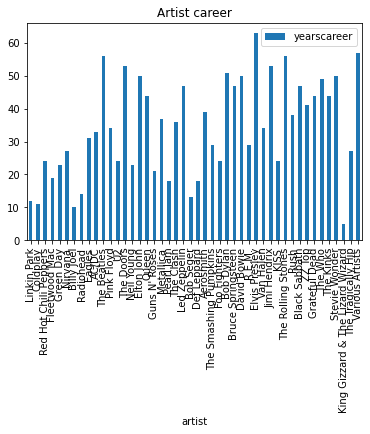

In [37]:
rockpopularity=rockartist[rockartist['totalsongartist']>15]
rockpopularity.sort_values('meanpopularity',ascending=False).plot(x='artist',y=['meanpopularity','totalsongartist'], kind ='bar', title='Artist popularty & total songs releas') 
rockpopularity.sort_values('meanpopularity',ascending=False).plot(x='artist',y=['meanpopularity','totalsongartist','yearscareer'], kind ='line', title='Artist popularty',subplots='artist')
rockpopularity.sort_values('meanpopularity',ascending=False).plot(x='artist',y=['yearscareer'], kind ='bar', title='Artist career')

In [10]:
artist=rockartist.T
new_header = artist.iloc[0]
artist = artist[1:]
artist.columns = new_header
artist

artist,Nirvana,Metallica,U2,Red Hot Chili Peppers,Pearl Jam,Guns N' Roses,James Brown,Bryan Adams,Tom Petty and the Heartbreakers,Ozzy Osbourne,...,Villainy,Foxy Shazam,Audio Idols,The Adults,Garfunkel and Oates,Matt Mays,The Mockers,Halestorm,One Bad Son,The Rubens
first_year,1991,1983,1980,1987,1991,1987,1973,1981,1976,1980,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
last_year,2018,2020,2004,2011,2009,2008,2003,1996,2009,2020,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
meanpopularity,61.473684,56.655172,58.892857,66.130435,56.545455,56.904762,48.0,53.071429,54.714286,53.357143,...,26.0,33.0,0.0,2.0,21.0,39.0,33.0,51.0,31.0,33.0
totalsongartist,19,29,28,23,22,21,5,14,14,14,...,2,1,1,1,1,1,1,1,1,1
yearscareer,27,37,24,24,18,21,30,15,33,40,...,0,0,0,0,0,0,0,0,0,0


In [11]:
artist.plot(x='artist',subplots=True)

KeyError: 'artist'

In [ ]:
#rocktotalreleaseyear=rocktotalreleaseyear[rocktotalreleaseyear['meanpopularity']>80]
# rocktotalreleaseyear.groupby(['artist']).plot(x='release_year',y='popularity', kind ='scatter', title='Artist popularty and rate of release') 
#rocktotalreleaseyear.groupby(['artist']).plot(x='release_year',y='popularity', kind ='bar', title='Artist popularty and rate of release') 